In [2]:
# libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd


BM_only_elong =[204.90845165755692, 206.69282439879052, 158.45057189880552, 127.34242046408895, 120.16743051661925, 104.83956210168876]
BM_only_sem=[14.297390058170748, 18.878924225541994, 12.571677762792062, 8.91265109511149, 7.730409112605373, 6.410110000267602]
BM_only_trans =  [150.72287560535517, 137.06440634549014, 94.24984757042442, 68.85980176632238, 65.41590488082032, 53.488880058126455]
BM_only_rxn =  [54.27406352527313, 69.41012558963209, 64.19602892888079, 58.47318337225138, 54.8565945941478, 51.36701617400629]


preload_elong = [37.55369102066618, 37.49948145305508, 36.96692009009822, 36.17816640526125, 34.95225145399006, 36.926179991576355] 
preload_elong = np.array(preload_elong)+np.array([1000/1529+1000/209+1000/200+1000/32])
preload_trans =  [32.859535130295335, 31.57011761916565, 27.56466029647917, 30.14047573290324, 28.449483897440242, 33.78366540405809] 
preload_rxn =  np.array([3.3518898116346367, 7.489156777278574, 7.352156280025974, 8.145148917395716, 6.540790375836698, 6.580570010299917])+np.array([1000/1529+1000/209+1000/200+1000/32])
preload_elong_sem = [0.24889287616063552, 0.25112967891183013, 0.24506298102378982, 0.2318693917252581, 0.23944370814903732, 0.25011617182843127]                     

presortpreload_elong =[40.4064752088474,23.381241263119602,12.985339174878561,9.354347032847222,7.578234613339236,7.5482930465551705]
###Bias amount: [1.5,3,5.5,7,8,8]
presortpreload_sem=[0.605,0.41,0.31,0.24,0.20,0.20]

86.68871123197135
1.7666032007762373
1.0514674606787322
jo 82.44545311560375
49.07084465480462


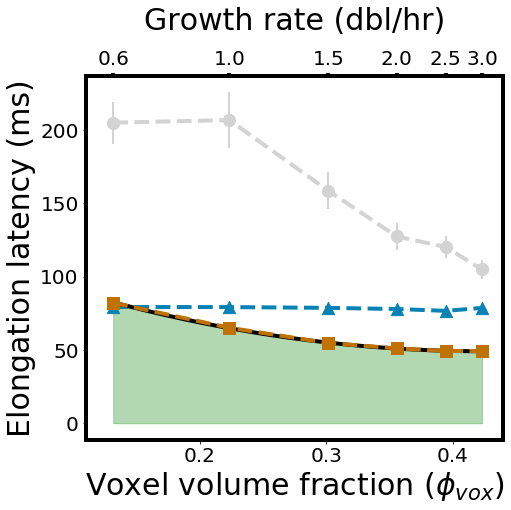

In [4]:
fig,ax= plt.subplots(1,1,figsize=(8,8))

x=np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
       0.42317604])
y_model,SS_err,_,_,_ = np.polyfit(x,[1000/12,1000/16,1000/18,1000/19,1000/20,1000/21],2,full=True)
y_hat = np.polyval(y_model,x)
x_sweep_i = np.linspace(min(x),max(x),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,marker='o',markersize=0,markeredgewidth=5,markevery=199,linewidth=4,color='black')
ax.fill_between(x_sweep_i, y_hat_sweep_i, 0*y_hat_sweep_i, color='green',alpha=0.3)


#####Brownian motion only

ax.scatter(x,BM_only_elong,zorder=2,s=150,marker='o',color='lightgray',alpha=1)
ax.errorbar(x,BM_only_elong,BM_only_sem,zorder=4,linewidth=4,elinewidth=2,linestyle='dashed',color='lightgray',alpha=1)

######Preload
ax.scatter(x,np.array(preload_elong),zorder=2,s=150,marker='^',color='#0683b4',alpha=1)
ax.errorbar(x, np.array(preload_elong), np.array(preload_elong_sem),zorder=1,linewidth=4,elinewidth=2,linestyle='dashed',color='#0683b4',alpha=1)
print((45+1000/1529+1000/209+1000/200+1000/32))
print((45+1000/1529+1000/209+1000/200+1000/32)/y_hat_sweep_i[-1])
print((45+1000/1529+1000/209+1000/200+1000/32)/y_hat_sweep_i[0])
print('jo',y_hat_sweep_i[0])

print(y_hat_sweep_i[-1])

######Preload + Presort
ax.plot(x,presortpreload_elong+np.array([1000/1529+1000/209+1000/200+1000/32]),zorder=5,marker='s',markersize=8,markeredgewidth=5,linewidth=0,color='#bf7200',alpha=1)
ax.errorbar(x,presortpreload_elong+np.array([1000/1529+1000/209+1000/200+1000/32]),presortpreload_sem,zorder=4,linewidth=4,elinewidth=2,color='#bf7200',linestyle='dashed',alpha=1)

ax1 = ax.twiny()
ax1.set_xlim(0.11,0.44)
ax1.tick_params(axis='both', which='major',width=4, labelsize=20)
#ax1.scatter(x_sweep_i,y_hat_sweep_i)
ax1.set_xticks(x)
ax1.set_xlabel('Growth rate (dbl/hr)',size=30,color='black',labelpad=20)
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels = ['0.6','1.0','1.5','2.0','2.5','3.0']
ax1.set_xticklabels(labels)
#ax.set_ylim(0,300)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlim(0.11,0.44)
ax.set_xlabel(r'Voxel volume fraction $(\phi_{vox})$',size=30,color='black')
ax.set_ylabel(r'Elongation latency (ms)',size=30,color='black')
plt.tight_layout(pad=4.0)

1.6161056919072934 0.6366472523090216 0.29828302763490466 [0.40581429]
[41.6446221  20.81128877 13.86684432 10.94286772  8.31128877  5.93033639]


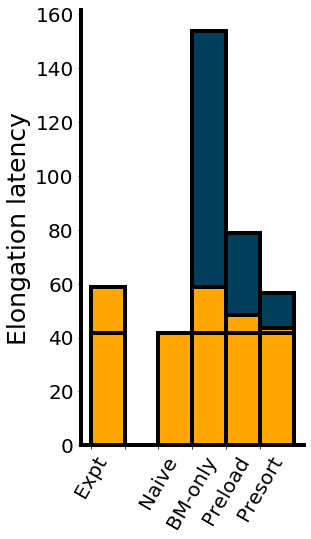

In [2]:
fig,ax=plt.subplots(1,1,figsize=(4,8))
expt_elong = np.array([1000/12,1000/16,1000/18,1000/19,1000/20,1000/21])
match_rxn = np.array([1000/1529+1000/209+1000/200+1000/32])

BM_only_elong =np.array([204.90845165755692, 206.69282439879052, 158.45057189880552, 127.34242046408895, 120.16743051661925, 104.83956210168876])
BM_only_sem= np.array([14.297390058170748, 18.878924225541994, 12.571677762792062, 8.91265109511149, 7.730409112605373, 6.410110000267602])
BM_only_trans =  np.array([150.72287560535517, 137.06440634549014, 94.24984757042442, 68.85980176632238, 65.41590488082032, 53.488880058126455])
BM_only_rxn =  np.array([54.27406352527313, 69.41012558963209, 64.19602892888079, 58.47318337225138, 54.8565945941478, 51.36701617400629])


preload_elong = np.array([36.21142494192998, 39.05927439644422, 34.91681657650515, 38.285624650298956, 34.99027427327694, 40.364235414358006] )
preload_elong = np.array(preload_elong)+np.array([1000/1529+1000/209+1000/200+1000/32])
preload_trans =  np.array([32.859535130295335, 31.57011761916565, 27.56466029647917, 30.14047573290324, 28.449483897440242, 33.78366540405809] )
preload_rxn =  np.array([3.3518898116346367, 7.489156777278574, 7.352156280025974, 8.145148917395716, 6.540790375836698, 6.580570010299917])+np.array([1000/1529+1000/209+1000/200+1000/32])
                                
presortpreload_elong =np.array([36.21142494192998,  17.357535886747577, 11.730928900813964, 10.107698330956518,  7.799635735314417,  5.761090774097384]
)
###Bias amount: [1,2,3,3.5,4.5,7]
presortpreload_sem=np.array([0.495518389669115,0.3065313307595597,0.16363724964738255,0.1467234788512787,0.11842922758156244,0.09412528299436541]
)
presortpreload_trans=np.array([32.859535130295335,14.997047110896354,10.152033718185963,8.634526845284789,6.581741747056677,4.6762812782310945]
)
presortpreload_rxn=np.array([3.3518898116346367,2.3604887758512163,1.5788951826279987,1.4390199270843849,1.2178939882577413,1.0848094958662904]
)+match_rxn

print(np.average(BM_only_trans)/np.average(BM_only_rxn),np.average(preload_trans)/np.average(preload_rxn),
     np.average(presortpreload_trans)/np.average(presortpreload_rxn),(np.average(expt_elong)-np.average(match_rxn))/match_rxn)


print(expt_elong-match_rxn)

# Values of each group
tau_match_rxn=[1,0,1,1,1,1]*match_rxn
tau_mismatch_rxn=np.array([0,0,0,np.average(BM_only_rxn-match_rxn),np.average(preload_rxn-match_rxn),np.average(presortpreload_rxn-match_rxn)])
tau_transport=np.array([0,0,0.08,np.average(BM_only_trans),np.average(preload_trans),np.average(presortpreload_trans)])
tau_mystery = np.array([np.average([1000/12,1000/16,1000/18,1000/19,1000/20,1000/21])-match_rxn,0,0,0,0,0])
 
# Heights of bars1 + bars2
tau_rxn = np.add(tau_match_rxn, tau_mismatch_rxn).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5]
 
# Names of group and bar width
names = ['Expt', '','Naive','BM-only','Preload','Presort']
barWidth = 1
 
# Create brown bars
plt.bar(r, tau_match_rxn, color='#ffa600', edgecolor='black', linewidth=4,width=barWidth,align='edge')
# Create green bars (middle), on top of the firs ones
plt.bar(r, tau_mismatch_rxn, bottom=tau_match_rxn, color='#ffa600', edgecolor='black',linewidth=4, width=barWidth,align='edge') #hatch='/'
# Create green bars (top)
plt.bar(r, tau_transport, bottom=tau_rxn , color='#003f5c', edgecolor='black', width=barWidth,linewidth=4,align='edge')

plt.bar(r,tau_mystery,bottom=tau_rxn,color='#ffa600',edgecolor='black',width=barWidth,linewidth=4,align='edge') #hatch='//'

# Custom X axis
plt.xticks(r, names,rotation=60)

plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().tick_params(axis='both', which='major', labelsize=20)

plt.ylabel('Elongation latency',size=25)
#plt.plot([-1,7],[np.average([1000/12,1000/16,1000/18,1000/19,1000/20,1000/21]),np.average([1000/12,1000/16,1000/18,1000/19,1000/20,1000/21])],color='black',linewidth=4,alpha=0.7)
#plt.plot([-1,7],[1000/1529+1000/209+1000/200+1000/32,1000/1529+1000/209+1000/200+1000/32],color='black',linewidth=4,alpha=0.7)

# Show graphic
plt.show()

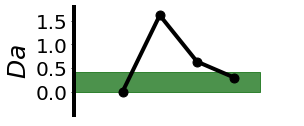

In [50]:
fig,ax=plt.subplots(1,1,figsize=(4,2))
ax.patch.set_alpha(.2)

plt.plot([0.3,1.3,2.3,3.3],[0,1.6161056919072934, 0.6366472523090216, 0.29828302763490466
],color='black',linewidth=4,marker='o',markersize=9)
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(0)
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().tick_params(axis='both', which='major', labelsize=20)
plt.xticks([])
plt.yticks([0,0.5,1.0,1.5])
plt.xlim(-1,5)
plt.ylim(-0.5,1.8)
#plt.plot([-1,5],[1,1],color='darkred',linewidth=4,linestyle='--')
plt.ylabel(r'$Da$',size =25)
plt.fill_between([-1,4],[0.40581429,0.40581429],color='darkgreen',alpha=0.7)



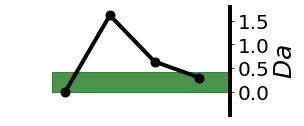

In [24]:
fig,ax=plt.subplots(1,1,figsize=(4,2))
plt.plot([0.3,1.3,2.3,3.3],[0,1.6161056919072934, 0.6366472523090216, 0.29828302763490466
],color='black',linewidth=4,marker='o',markersize=9)
plt.gca().spines['left'].set_linewidth(0)
plt.gca().spines['bottom'].set_linewidth(0)
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(4)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

plt.gca().tick_params(axis='both', which='major', labelsize=20)
plt.xticks([])
plt.yticks([0,0.5,1.0,1.5])
plt.xlim(-1,4)
plt.ylim(-0.5,1.8)
#plt.plot([-1,5],[1,1],color='darkred',linewidth=4,linestyle='--')
plt.ylabel(r'$Da$',size =25)
plt.fill_between([0,4],[0.40581429,0.40581429],color='darkgreen',alpha=0.7)

1.6161056919072934 0.6366472523090216 0.29828302763490466 [0.40581429]
[41.6446221  20.81128877 13.86684432 10.94286772  8.31128877  5.93033639]


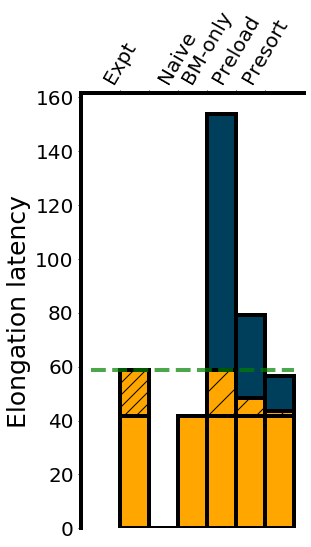

In [28]:
fig,ax=plt.subplots(1,1,figsize=(4,8))
expt_elong = np.array([1000/12,1000/16,1000/18,1000/19,1000/20,1000/21])
match_rxn = np.array([1000/1529+1000/209+1000/200+1000/32])

BM_only_elong =np.array([204.90845165755692, 206.69282439879052, 158.45057189880552, 127.34242046408895, 120.16743051661925, 104.83956210168876])
BM_only_sem= np.array([14.297390058170748, 18.878924225541994, 12.571677762792062, 8.91265109511149, 7.730409112605373, 6.410110000267602])
BM_only_trans =  np.array([150.72287560535517, 137.06440634549014, 94.24984757042442, 68.85980176632238, 65.41590488082032, 53.488880058126455])
BM_only_rxn =  np.array([54.27406352527313, 69.41012558963209, 64.19602892888079, 58.47318337225138, 54.8565945941478, 51.36701617400629])


preload_elong = np.array([36.21142494192998, 39.05927439644422, 34.91681657650515, 38.285624650298956, 34.99027427327694, 40.364235414358006] )
preload_elong = np.array(preload_elong)+np.array([1000/1529+1000/209+1000/200+1000/32])
preload_trans =  np.array([32.859535130295335, 31.57011761916565, 27.56466029647917, 30.14047573290324, 28.449483897440242, 33.78366540405809] )
preload_rxn =  np.array([3.3518898116346367, 7.489156777278574, 7.352156280025974, 8.145148917395716, 6.540790375836698, 6.580570010299917])+np.array([1000/1529+1000/209+1000/200+1000/32])
                                
presortpreload_elong =np.array([36.21142494192998,  17.357535886747577, 11.730928900813964, 10.107698330956518,  7.799635735314417,  5.761090774097384]
)
###Bias amount: [1,2,3,3.5,4.5,7]
presortpreload_sem=np.array([0.495518389669115,0.3065313307595597,0.16363724964738255,0.1467234788512787,0.11842922758156244,0.09412528299436541]
)
presortpreload_trans=np.array([32.859535130295335,14.997047110896354,10.152033718185963,8.634526845284789,6.581741747056677,4.6762812782310945]
)
presortpreload_rxn=np.array([3.3518898116346367,2.3604887758512163,1.5788951826279987,1.4390199270843849,1.2178939882577413,1.0848094958662904]
)+match_rxn

print(np.average(BM_only_trans)/np.average(BM_only_rxn),np.average(preload_trans)/np.average(preload_rxn),
     np.average(presortpreload_trans)/np.average(presortpreload_rxn),(np.average(expt_elong)-np.average(match_rxn))/match_rxn)


print(expt_elong-match_rxn)

# Values of each group
tau_match_rxn=[1,0,1,1,1,1]*match_rxn
tau_mismatch_rxn=np.array([0,0,0,np.average(BM_only_rxn-match_rxn),np.average(preload_rxn-match_rxn),np.average(presortpreload_rxn-match_rxn)])
tau_transport=np.array([0,0,0.08,np.average(BM_only_trans),np.average(preload_trans),np.average(presortpreload_trans)])
tau_mystery = np.array([np.average([1000/12,1000/16,1000/18,1000/19,1000/20,1000/21])-match_rxn,0,0,0,0,0])
 
# Heights of bars1 + bars2
tau_rxn = np.add(tau_match_rxn, tau_mismatch_rxn).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5]
 
# Names of group and bar width
names = ['Expt', '','Naive','BM-only','Preload','Presort']
barWidth = 1
 
# Create brown bars
plt.bar(r, tau_match_rxn, color='#ffa600', edgecolor='black', linewidth=4,width=barWidth,align='edge')
# Create green bars (middle), on top of the firs ones
plt.bar(r, tau_mismatch_rxn, bottom=tau_match_rxn, color='#ffa600', edgecolor='black',linewidth=4, width=barWidth,hatch='/',align='edge')
# Create green bars (top)
plt.bar(r, tau_transport, bottom=tau_rxn , color='#003f5c', edgecolor='black', width=barWidth,linewidth=4,align='edge')

plt.bar(r,tau_mystery,bottom=tau_rxn,color='#ffa600',edgecolor='black',width=barWidth,linewidth=4,hatch='//',align='edge')

# Custom X axis
plt.xticks(r, names,rotation=60)

plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(0)
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().tick_params(axis='both', which='major', labelsize=20)

plt.ylabel('Elongation latency',size=25)
plt.plot([-1,6],[np.average([1000/12,1000/16,1000/18,1000/19,1000/20,1000/21]),np.average([1000/12,1000/16,1000/18,1000/19,1000/20,1000/21])],color='green',linewidth=4,linestyle='--',alpha=0.7)
# Show graphic


ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")


plt.show()